In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import cv2 as cv

from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.cosmology import FlatLambdaCDM

import numpy as np
from scipy import special
from scipy.stats import kstwobign, anderson
import scipy.stats.distributions as dist


plt.rcParams['font.size'] = 14

In [2]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
cos_dat_fold = 'E:/cosmos-data'

### Importing Data

In [3]:
agn_cat = pd.read_csv(f'{combine_fold}/source-agn-cat-fixed.csv', index_col = 0)

In [4]:
df_cat = pd.read_csv(f'{combine_fold}/dor-all-restaged-full.csv', index_col = 0)

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df_cat.head()

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,0.000002,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-0.000010,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279


In [7]:
len(agn_cat)

802

In [8]:
agn_cat.agn_clsf.value_counts()

SFG    551
AGN    251
Name: agn_clsf, dtype: int64

In [9]:
df_cat

,ORyanID_23,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage4,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-1.043282e-05,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,860686,stage3,150.644522,2.237226,10047.978516,22713.351562,0.000051,0.000046,1.571297e-06,...,-9.314209,-9.106611,-8.941274,-8.713107,-8.541205,0.341270,0.545498,0.732327,0.906665,1.020098
2,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-2.881107e-06,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
3,4000705540034,1304538,stage3,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-6.036952e-06,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727
4,4000705540064,1310001,stage3,149.701230,2.660343,32667.441406,32867.789062,0.000026,0.000020,-1.023530e-05,...,-9.882174,-9.855921,-9.816085,-9.697225,-9.573506,0.455258,0.482555,0.522239,0.600383,0.660279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,stage4,149.891374,2.866981,28107.876953,37826.437500,0.000086,0.000104,-9.313976e-07,...,-9.441206,-9.279022,-9.095134,-9.003501,-8.955496,0.120441,0.213251,0.306832,0.556012,0.731876
4177,4546055995_extra,1520749,stage2,150.383110,2.865367,16320.103516,37787.917969,0.000131,0.000236,7.123858e-05,...,-9.857880,-9.658215,-9.485625,-9.235816,-8.971795,0.162147,0.238640,0.432004,0.592193,0.687256
4178,4000927318133_extra,1523385,stage3,149.789910,2.865132,30540.179688,37782.648438,0.000045,0.000059,1.600747e-05,...,-9.525900,-9.472779,-9.353454,-9.273221,-9.213521,0.262676,0.355466,0.410356,0.489105,0.566003
4179,4000747939904_extra,1524909,stage3,150.450581,2.872371,14702.710938,37956.468750,0.000248,0.000292,7.378556e-06,...,-9.556987,-9.385500,-9.154130,-9.026810,-8.938077,0.153294,0.283249,0.436332,0.600615,0.693621


In [10]:
df_red_tmp = df_cat.query('ez_sfr < 10')
df_red = df_red_tmp.query('lp_mass_best > 9.25 and lp_mass_best <= 12.5')

In [11]:
def get_redshift(ez_z, lp_z):
    if np.isnan(ez_z):
        if not np.isnan(lp_z):
            return lp_z
        else:
            return np.nan
    
    if np.isnan(lp_z):
        if not np.isnan(ez_z):
            return ez_z
        else:
            return np.nan
    
    if lp_z < ez_z:
        return lp_z
    elif ez_z <= lp_z:
        return ez_z
    else:
        return 'what'

In [12]:
df_redshifts = df_red.assign(redshift = df_red.apply(lambda row: get_redshift(row.ez_z_phot,row.lp_zBEST), axis = 1))

In [13]:
df_vol_lim = df_redshifts[['ORyanID_23', 'ID', 'redshift', 'lp_mass_best','ez_sfr','category']].query('redshift <= 1.2')

In [14]:
df_vol_lim

,ORyanID_23,ID,redshift,lp_mass_best,ez_sfr,category
0,4000705532455,816891,0.519525,9.28590,0.589695,stage4
1,4000705533383,860686,1.124400,10.44862,1.609304,stage3
3,4000705540034,1304538,1.024009,9.96798,1.101499,stage3
4,4000705540064,1310001,0.486400,10.41827,1.083541,stage3
5,4000705540104,1308927,0.695800,10.03523,1.198906,stage3
...,...,...,...,...,...,...
4176,4001204758614_extra,1520733,0.484922,9.27097,0.369745,stage4
4177,4546055995_extra,1520749,0.647512,9.50357,0.507741,stage2
4178,4000927318133_extra,1523385,0.301645,9.53909,0.406027,stage3
4179,4000747939904_extra,1524909,0.855695,9.76084,0.637714,stage3


In [15]:
df_or_noextra = (
    df_vol_lim
    .assign(extra = df_vol_lim.ORyanID_23.apply(lambda x: True if type(x) == str and 'extra' in str(x) else False))
    .query('extra == False')
)

In [33]:
df_agn_quants = (
    df_cat
    .merge(agn_cat, how = 'left', on = 'ID')
    [['ORyanID_23', 'ID', 'lp_mass_best','ez_sfr','category', 'agn_clsf']]
)

In [36]:
df_agn_quants.dropna().agn_clsf.value_counts()

SFG    549
AGN    251
Name: agn_clsf, dtype: int64

In [37]:
def get_agn_clsf(clsf):
    if type(clsf) == str:
        if clsf == "HLAGN" or clsf == "MLAGN":
            return 'AGN'
        else:
            return clsf
    else:
        return 'unknown'

In [38]:
df_sorted = (
    df_agn_quants
    .assign(all_clsf = df_agn_quants.agn_clsf.apply(lambda x: get_agn_clsf(x)))
)

In [56]:
df_cntd = df_sorted.drop(columns = 'agn_clsf').dropna()

In [40]:
df_noextra = (
    df_sorted
    .assign(extra_cont = df_red.ORyanID_23.apply(lambda x: 'y' if type(x) == str and 'extra' in x else 'n'))
    .query('extra_cont == "n"')
    .drop(columns = ['extra_cont'])
)

## Finding More SFG

In [41]:
df_test = df_noextra.drop(columns = 'agn_clsf').dropna()
len(df_test)

2737

In [42]:
frac_list = []
for i in range(1,5):
    df_stage = df_test.query(f'category == "stage{i}"')
    fraction = len(df_stage.query('all_clsf == "AGN"')) / len(df_stage)
    frac_list.append(fraction)
print(frac_list)

[0.07547169811320754, 0.06224066390041494, 0.06790697674418604, 0.07766990291262135]


In [43]:
frac_list = []
for i in range(1,5):
    df_stage = df_sorted.query(f'category == "stage{i}"')
    fraction = len(df_stage.query('all_clsf == "AGN"')) / len(df_stage)
    frac_list.append(fraction)
frac_list

[0.0675990675990676,
 0.052732502396931925,
 0.057704918032786885,
 0.06622516556291391]

In [44]:
x = ['Separated', 'Pericentre', 'Apocentre','Merging']

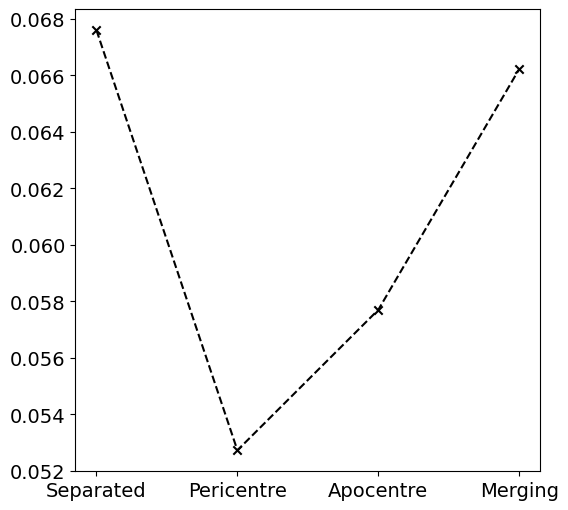

In [45]:
plt.figure(figsize = (6,6))
plt.scatter(x, frac_list, color = 'black', marker = 'x')
plt.plot(x, frac_list, color = 'black', linestyle='--')
plt.show()

In [46]:
frac_list = []
for i in range(1,5):
    df_stage = df_test.query(f'category == "stage{i}"')
    print(df_stage.all_clsf.value_counts())
    print(' ')

unknown    346
SFG         46
AGN         32
Name: all_clsf, dtype: int64
 
unknown    573
SFG        105
AGN         45
Name: all_clsf, dtype: int64
 
unknown    827
SFG        175
AGN         73
Name: all_clsf, dtype: int64
 
unknown    379
SFG         96
AGN         40
Name: all_clsf, dtype: int64
 


In [48]:
frac_list = []
for i in range(1,5):
    df_stage = df_sorted.query(f'category == "stage{i}"')
    print(df_stage.all_clsf.value_counts())
    print(' ')

unknown    721
SFG         79
AGN         58
Name: all_clsf, dtype: int64
 
unknown    853
SFG        135
AGN         55
Name: all_clsf, dtype: int64
 
unknown    1221
SFG         216
AGN          88
Name: all_clsf, dtype: int64
 
unknown    584
SFG        121
AGN         50
Name: all_clsf, dtype: int64
 


## Looking at Data

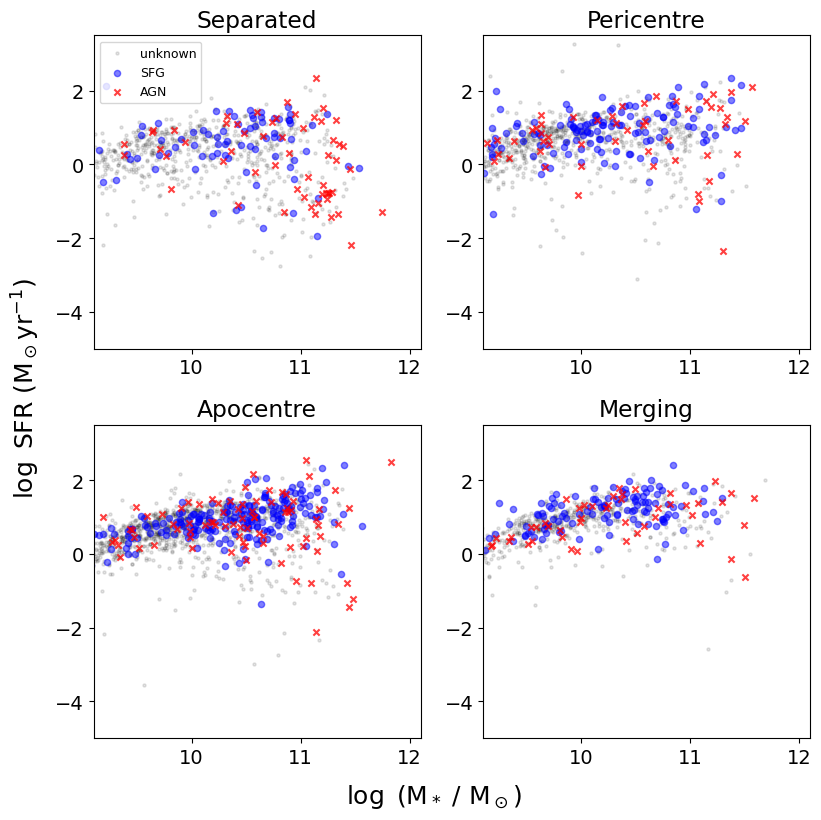

In [49]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
alphas = [0.1, 0.5, 0.75]
markers = ['.', 'o', 'x']
agn_clsf = ['unknown','SFG','AGN']
colours = ['black', 'blue', 'red']
stage_list = ['Separated','Pericentre','Apocentre','Merging']
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_sorted.query('category == @stage')
        for k, clsf in enumerate(agn_clsf):
            df = df_stage.query('all_clsf == @clsf')

            ax[i,j].scatter(np.array(df.lp_mass_best), np.array(df.ez_sfr), color = colours[k], marker = markers[k], s = 20, alpha = alphas[k])
            ax[i,j].set_title(f'{stage_list[counter-1]}')
            ax[i,j].set_xlim([9.1, 12.1])
            ax[i,j].set_ylim([-5,3.5])
        
        counter += 1
ax[0,0].legend(agn_clsf, loc = 'upper left', fontsize = 9)
fig.text(0.5, -0.01, '$\log$ (M$_*$ / M$_\odot$)', ha='center', va='center', fontsize = 18)
fig.text(-0.01, 0.5, '$\log$ SFR (M$_\odot$yr$^{-1}$)', ha='center', va='center', rotation='vertical', fontsize = 18)
fig.tight_layout()
# fig.savefig(f'{fig_folder}/agn-stage-dist.pdf', bbox_inches = 'tight')
plt.show()

## Weighting

In [50]:
def weight_dist(arrs, bins=None, return_bins=True, renorm=False, compare = 3):
    # this will take 2 arrays of values from 2 different samples
    # e.g. redshift distributions from 2 samples
    # and return weights for each value such that the weighted
    # distributions of each sample will match.

    # note the bins need to be the same for both datasets
    # so either supply 1 number or 1 array of bin edges
    # also if you have fully specified the bins you don't need them returned
    # but if we've had to figure them out, you do need them returned
    # if you want to make sure you aren't under-weighting (e.g. if a whole dataset is
    # much larger than the other so you might always be able select >1 object
    # in dataset 1 for each object in dataset 2) then you can re-normalise to make
    # sure the max weight of both datasets is 1
    # Note, if the distributions cross this won't make a difference

    # weight arrays
    # w1 = np.zeros_like(arr1)
    # w2 = np.zeros_like(arr2)
    
    if len(arrs) != 4:
        print('This has been set up to handle 4 distributions!')
        print('You have not provided four distributions.')
        sys.exit()
    
    ws_list = []
    for i in arrs:
        ws_list.append(np.zeros_like(i))

    hists = []
    _, thebins = np.histogram(arrs[3], bins=bins)  # returns (counts_arr, bins_arr)
    # use the bins from hist1 to make hist2
    # note: for these purposes, any values of hist2 outside the minmax range of hist1 should have 0 weight
    # which is taken care of by the zeros_like initialisation of w1 and w2 above
    # so it's fine for them to be excluded below
    # hists.append(hist1)
    for i in arrs:
        hist_tmp, _ = np.histogram(i, bins=thebins)
        hists.append(hist_tmp)

    # now step through the bins and assign weights
    for i_bin in range(len(thebins)-1):
        # zero-"index"ing these because they're indices and not values
        # and if I get them mixed up below I want this to error that there's no b2 or whatever
        b0 = thebins[i_bin]
        b1 = thebins[i_bin+1]

        count1 = hists[0][i_bin]
        count2 = hists[1][i_bin]
        count3 = hists[2][i_bin]
        count4 = hists[3][i_bin]

        # don't miss any values and don't double-count
        if i_bin == 0:
            in_bin1 = (arrs[0] >= b0) & (arrs[0] <= b1)
            in_bin2 = (arrs[1] >= b0) & (arrs[1] <= b1)
            in_bin3 = (arrs[2] >= b0) & (arrs[2] <= b1)
            in_bin4 = (arrs[3] >= b0) & (arrs[3] <= b1)
        else: 
            in_bin1 = (arrs[0] >  b0) & (arrs[0] <= b1)
            in_bin2 = (arrs[1] >  b0) & (arrs[1] <= b1)
            in_bin3 = (arrs[2] >  b0) & (arrs[2] <= b1)
            in_bin4 = (arrs[3] >  b0) & (arrs[3] <= b1)
            
        # don't divide by 0 in the rest of the if/else
        if (count1 == 0) | (count2 == 0) | (count3 == 0) | (count4 == 0):
            ws_list[0][in_bin1] = 0.0
            ws_list[1][in_bin2] = 0.0
            ws_list[2][in_bin3] = 0.0
            ws_list[3][in_bin4] = 0.0

        elif count1 <= count2 and count1 <= count3 and count1 <= count4:
            # weight count2 values so the sum of wt2 in this bin equals count1
            # wt_fac will always be < 1
            ws_list[0][in_bin1] = 1.0
            ws_list[1][in_bin2] = float(count1)/float(count2)
            ws_list[2][in_bin3] = float(count1)/float(count3)
            ws_list[3][in_bin4] = float(count1)/float(count4)
            
        elif count2 <= count1 and count2 <= count3 and count2 <= count4:
            ws_list[0][in_bin1] = float(count2)/float(count1)
            ws_list[1][in_bin2] = 1.0
            ws_list[2][in_bin3] = float(count2)/float(count3)
            ws_list[3][in_bin4] = float(count2)/float(count4)
            
        elif count3 <= count1 and count3 <= count2 and count3 <= count4:
            ws_list[0][in_bin1] = float(count3)/float(count1)
            ws_list[1][in_bin2] = float(count3)/float(count2)
            ws_list[2][in_bin3] = 1.0
            ws_list[3][in_bin4] = float(count3)/float(count4)
            
        elif count4 <= count1 and count4 <= count2 and count4 <= count3:
            ws_list[0][in_bin1] = float(count4)/float(count1)
            ws_list[1][in_bin2] = float(count4)/float(count2)
            ws_list[2][in_bin3] = float(count4)/float(count3)
            ws_list[3][in_bin4] = 1.0
                        
        else:
            print('What the hell happened.')
            print(count1)
            print(count2)
            print(count3)
            print(count4)
            sys.exit()

        # else:
        #     # weight count1 values so the sum of wt1 in this bin equals count2
        #     # wt_fac will always be <= 1
        #     wt_fac = float(count2)/float(count1)
        #     ws_list[compare][in_bin1] = wt_fac
        #     ws_list[i_hist][in_bin2] = 1.0


    # now the weights should be determined
    # we can optionally re-normalise to make sure we are getting max value out of the datasets
    if renorm:
        if (np.sum(ws) > 0.00000) & (np.amax(w1) < 1.0):
            ws /= np.amax(ws)

        if (np.sum(ws) > 0.00000) & (np.amax(w2) < 1.0):
            ws /= np.amax(ws)


    if return_bins:
        return ws_list, thebins 
    else: 
        return ws_list

In [57]:
df_stage1 = df_cntd.query('category == "stage1"')
df_stage2 = df_cntd.query('category == "stage2"')
df_stage3 = df_cntd.query('category == "stage3"')
df_stage4 = df_cntd.query('category == "stage4"')

In [58]:
weights_list, thebins = weight_dist(
    [
        df_stage1['lp_mass_best'], 
        df_stage2['lp_mass_best'], 
        df_stage3['lp_mass_best'],
        df_stage4['lp_mass_best']
    ], 
    bins = 8,
    renorm = False,
    return_bins = True
)

In [59]:
df_weights_s1 = df_stage1.assign(weights = weights_list[0])
df_weights_s2 = df_stage2.assign(weights = weights_list[1])
df_weights_s3 = df_stage3.assign(weights = weights_list[2])
df_weights_s4 = df_stage4.assign(weights = weights_list[3])

## Looking at Fractions

In [60]:
fraction_s1 = (
    (df_weights_s1.query('all_clsf == "AGN"').weights.sum()) / (df_weights_s1.weights.sum())
)

In [61]:
fraction_s1

0.05108195949504738

In [62]:
unknown_fraction_s1 = 1 - (
    ((df_weights_s1.query('all_clsf == "AGN"').weights.sum()) + (df_weights_s1.query('all_clsf == "SFG"').weights.sum())) / ((df_weights_s1.weights.sum()))
)

In [63]:
unknown_fraction_s1

0.8613519331580044

In [64]:
fraction_s1 / unknown_fraction_s1

0.05930439989582867

In [65]:
fraction_s2 = (
    (df_weights_s2.query('all_clsf == "AGN"').weights.sum()) / df_weights_s2.weights.sum()
)
fraction_s2

0.05040415992190846

In [66]:
unknown_fraction_s2 = 1 - (
    ((df_weights_s2.query('all_clsf == "AGN"').weights.sum()) + (df_weights_s2.query('all_clsf == "SFG"').weights.sum())) / ((df_weights_s2.weights.sum()))
)
unknown_fraction_s2

0.815375397528464

In [67]:
fraction_s2 / unknown_fraction_s2

0.061817121383220174

In [68]:
fraction_s3 = (
    (df_weights_s3.query('all_clsf == "AGN"').weights.sum()) / df_weights_s3.weights.sum()
)
fraction_s3

0.05426274678193296

In [69]:
unknown_fraction_s3 = 1 - (
    ((df_weights_s3.query('all_clsf == "AGN"').weights.sum()) + (df_weights_s3.query('all_clsf == "SFG"').weights.sum())) / ((df_weights_s3).weights.sum())
)
unknown_fraction_s3

0.8111473076134726

In [70]:
fraction_s3 / unknown_fraction_s3

0.06689629155224935

In [71]:
fraction_s4 = (
    (df_weights_s4.query('all_clsf == "AGN"').weights.sum()) / (df_weights_s4.weights.sum())
)
fraction_s4

0.06619521241398946

In [72]:
unknown_fraction_s4 = 1 - (
    ((df_weights_s4.query('all_clsf == "AGN"').weights.sum()) + (df_weights_s4.query('all_clsf == "SFG"').weights.sum())) / ((df_weights_s4).weights.sum())
)
unknown_fraction_s4

0.7716773649073189

In [73]:
fraction_s4 / unknown_fraction_s4

0.08578094346714411

In [74]:
print(fraction_s1 / unknown_fraction_s1)
print(fraction_s2 / unknown_fraction_s2)
print(fraction_s3 / unknown_fraction_s3)
print(fraction_s4 / unknown_fraction_s4)

0.05930439989582867
0.061817121383220174
0.06689629155224935
0.08578094346714411


In [75]:
weighted_fraction = []

weighted_fraction.append(fraction_s1 / unknown_fraction_s1)
weighted_fraction.append(fraction_s2 / unknown_fraction_s2)
weighted_fraction.append(fraction_s3 / unknown_fraction_s3)
weighted_fraction.append(fraction_s4 / unknown_fraction_s4)

In [76]:
x = ['Separated', 'Pericentre', 'Apocentre','Merging']

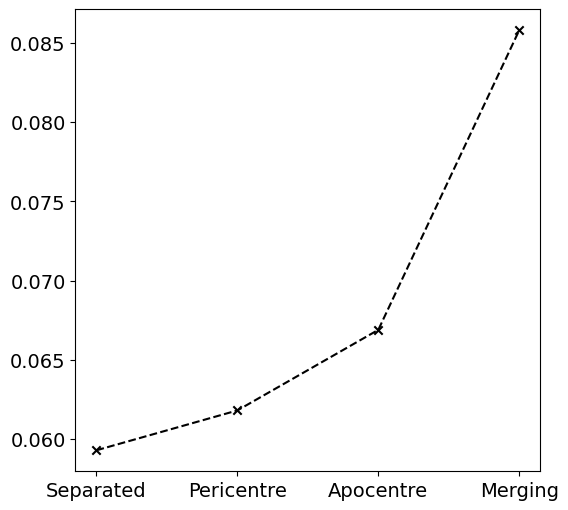

In [77]:
plt.figure(figsize = (6,6))
plt.scatter(x, weighted_fraction, color = 'black', marker = 'x')
plt.plot(x, weighted_fraction, color = 'black', linestyle='--')
plt.show()

## Getting Weighted Fractions

### Only Classifieds

In [78]:
df_rem_unk = (
    df_sorted
    .query('all_clsf != "unknown"')
)

In [79]:
df_rem_unk

,ORyanID_23,ID,lp_mass_best,ez_sfr,category,agn_clsf,all_clsf
11,4000705547180,1264241,10.53484,1.474177,stage1,SFG,SFG
12,4000706649921,844303,11.05237,2.547000,stage3,AGN,AGN
14,4000707046655,219965,9.38022,0.243848,stage1,AGN,AGN
15,4000707047113,230625,10.65441,0.285223,stage3,AGN,AGN
18,4000707049267,250320,10.56664,1.082212,stage3,SFG,SFG
...,...,...,...,...,...,...,...
4145,4001047625860_extra,1473684,10.61118,1.825090,stage2,SFG,SFG
4146,4000711824236_extra,1475260,11.05202,-1.197355,stage2,SFG,SFG
4167,4000927318021_extra,1513748,9.51840,0.166576,stage3,AGN,AGN
4174,4546055995_extra,1519536,9.41503,0.294519,stage3,SFG,SFG


In [80]:
df_stage1 = df_sorted.query('category == "stage1"')
df_stage2 = df_sorted.query('category == "stage2"')
df_stage3 = df_sorted.query('category == "stage3"')
df_stage4 = df_sorted.query('category == "stage4"')

In [81]:
print(len(df_stage1.query('all_clsf == "AGN"')) / (len(df_stage1.query('all_clsf == "AGN"')) + len(df_stage1.query('all_clsf == "SFG"'))))
print(len(df_stage2.query('all_clsf == "AGN"')) / (len(df_stage2.query('all_clsf == "AGN"')) + len(df_stage2.query('all_clsf == "SFG"'))))
print(len(df_stage3.query('all_clsf == "AGN"')) / (len(df_stage3.query('all_clsf == "AGN"')) + len(df_stage3.query('all_clsf == "SFG"'))))
print(len(df_stage4.query('all_clsf == "AGN"')) / (len(df_stage4.query('all_clsf == "AGN"')) + len(df_stage4.query('all_clsf == "SFG"'))))

0.4233576642335766
0.2894736842105263
0.2894736842105263
0.29239766081871343


In [82]:
df_unk_rem = df_sorted.query('all_clsf != "unknown"')

In [83]:
df_unk_rem

,ORyanID_23,ID,lp_mass_best,ez_sfr,category,agn_clsf,all_clsf
11,4000705547180,1264241,10.53484,1.474177,stage1,SFG,SFG
12,4000706649921,844303,11.05237,2.547000,stage3,AGN,AGN
14,4000707046655,219965,9.38022,0.243848,stage1,AGN,AGN
15,4000707047113,230625,10.65441,0.285223,stage3,AGN,AGN
18,4000707049267,250320,10.56664,1.082212,stage3,SFG,SFG
...,...,...,...,...,...,...,...
4145,4001047625860_extra,1473684,10.61118,1.825090,stage2,SFG,SFG
4146,4000711824236_extra,1475260,11.05202,-1.197355,stage2,SFG,SFG
4167,4000927318021_extra,1513748,9.51840,0.166576,stage3,AGN,AGN
4174,4546055995_extra,1519536,9.41503,0.294519,stage3,SFG,SFG


In [85]:
df_stage1 = df_cntd.query('category == "stage1"')
df_stage2 = df_cntd.query('category == "stage2"')
df_stage3 = df_cntd.query('category == "stage3"')
df_stage4 = df_cntd.query('category == "stage4"')

In [86]:
weights_list, thebins = weight_dist(
    [
        df_stage1['lp_mass_best'], 
        df_stage2['lp_mass_best'], 
        df_stage3['lp_mass_best'],
        df_stage4['lp_mass_best']
    ], 
    bins = 8,
    renorm = False,
    return_bins = True
)

In [87]:
df_s1_weighted = df_stage1.assign(weights = weights_list[0])
df_s2_weighted = df_stage2.assign(weights = weights_list[1])
df_s3_weighted = df_stage3.assign(weights = weights_list[2])
df_s4_weighted = df_stage4.assign(weights = weights_list[3])

In [88]:
weighted_fractions = []

df_s1_agn = df_s1_weighted.query('all_clsf == "AGN"')
df_s1_sfg = df_s1_weighted.query('all_clsf == "SFG"')
df_s1_unk = df_s1_weighted.query('all_clsf == "unknown"')

weighted_agn_counts_s1 = np.sum(np.ones(len(df_s1_agn)) * np.array(list(df_s1_agn.weights)))
weighted_sfg_counts_s1 = np.sum(np.ones(len(df_s1_sfg)) * np.array(list(df_s1_sfg.weights)))
weighted_unk_counts_s1 = np.sum(np.ones(len(df_s1_unk)) * np.array(list(df_s1_unk.weights)))
print(weighted_agn_counts_s1 / (weighted_sfg_counts_s1 + weighted_agn_counts_s1 + weighted_unk_counts_s1))
weighted_fractions.append(weighted_agn_counts_s1 / (weighted_sfg_counts_s1 + weighted_agn_counts_s1 + weighted_unk_counts_s1))

0.05108195949504738


In [90]:
df_s2_agn = df_s2_weighted.query('all_clsf == "AGN"')
df_s2_sfg = df_s2_weighted.query('all_clsf == "SFG"')
df_s2_unk = df_s2_weighted.query('all_clsf == "unknown"')


weighted_agn_counts_s2 = np.sum(np.ones(len(df_s2_agn)) * np.array(list(df_s2_agn.weights)))
weighted_sfg_counts_s2 = np.sum(np.ones(len(df_s2_sfg)) * np.array(list(df_s2_sfg.weights)))
weighted_unk_counts_s2 = np.sum(np.ones(len(df_s2_unk)) * np.array(list(df_s2_unk.weights)))
print(weighted_agn_counts_s2 / (weighted_sfg_counts_s2 + weighted_agn_counts_s2 + weighted_unk_counts_s2))
weighted_fractions.append(weighted_agn_counts_s2 / (weighted_sfg_counts_s2 + weighted_agn_counts_s2 + weighted_unk_counts_s2))

0.05040415992190846


In [91]:
df_s3_agn = df_s3_weighted.query('all_clsf == "AGN"')
df_s3_sfg = df_s3_weighted.query('all_clsf == "SFG"')
df_s3_unk = df_s3_weighted.query('all_clsf == "unknown"')

weighted_agn_counts_s3 = np.sum(np.ones(len(df_s3_agn)) * np.array(list(df_s3_agn.weights)))
weighted_sfg_counts_s3 = np.sum(np.ones(len(df_s3_sfg)) * np.array(list(df_s3_sfg.weights)))
weighted_unk_counts_s3 = np.sum(np.ones(len(df_s3_unk)) * np.array(list(df_s3_unk.weights)))
print(weighted_agn_counts_s3 / (weighted_sfg_counts_s3 + weighted_agn_counts_s3 + weighted_unk_counts_s3))
weighted_fractions.append(weighted_agn_counts_s3 / (weighted_sfg_counts_s3 + weighted_agn_counts_s3 + weighted_unk_counts_s3))

0.05426274678193296


In [92]:
df_s4_agn = df_s4_weighted.query('all_clsf == "AGN"')
df_s4_sfg = df_s4_weighted.query('all_clsf == "SFG"')
df_s4_unk = df_s4_weighted.query('all_clsf == "unknown"')

weighted_agn_counts_s4 = np.sum(np.ones(len(df_s4_agn)) * np.array(list(df_s4_agn.weights)))
weighted_sfg_counts_s4 = np.sum(np.ones(len(df_s4_sfg)) * np.array(list(df_s4_sfg.weights)))
weighted_unk_counts_s4 = np.sum(np.ones(len(df_s4_unk)) * np.array(list(df_s4_unk.weights)))
print(weighted_agn_counts_s4 / (weighted_sfg_counts_s4 + weighted_agn_counts_s4 + weighted_unk_counts_s4))
weighted_fractions.append(weighted_agn_counts_s4 / (weighted_sfg_counts_s4 + weighted_agn_counts_s4 + weighted_unk_counts_s4))

0.06619521241398946


In [93]:
x = ['Separated', 'Pericentre', 'Apocentre','Merging']

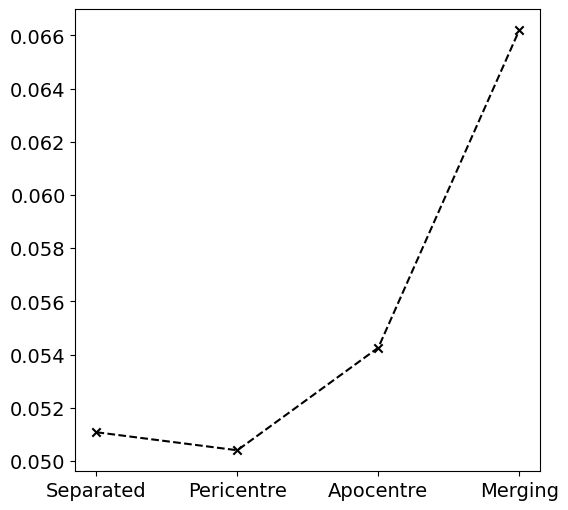

In [94]:
plt.figure(figsize = (6,6))
plt.scatter(x, weighted_fractions, color = 'black', marker = 'x')
plt.plot(x, weighted_fractions, color = 'black', linestyle='--')
plt.show()

## Adding Errors

In [95]:
def lower_beta(c,k,n):
    return dist.beta.ppf((1-c)/2, k+1, n-k+1)

In [96]:
def upper_beta(c,k,n):
    return dist.beta.ppf(1-(1-c)/2, k+1, n-k+1)

In [97]:
weighted_agn = [weighted_agn_counts_s1, weighted_agn_counts_s2, weighted_agn_counts_s3, weighted_agn_counts_s4]
weighted_sfgs = [weighted_sfg_counts_s1, weighted_sfg_counts_s2, weighted_sfg_counts_s3, weighted_sfg_counts_s4]
weighted_unks = [weighted_unk_counts_s1, weighted_unk_counts_s2, weighted_unk_counts_s3, weighted_unk_counts_s4]

In [98]:
unweighted_agn = [len(df_s1_agn), len(df_s2_agn), len(df_s3_agn), len(df_s4_agn)]
unweighted_sfgs = [len(df_s1_sfg), len(df_s2_sfg), len(df_s3_sfg), len(df_s4_sfg)]
unweighted_unks = [len(df_s1_unk), len(df_s2_unk),len(df_s3_unk),len(df_s4_unk)]

In [99]:
unweighted_fracs = [
    unweighted_agn[0] / (unweighted_agn[0] + unweighted_sfgs[0] + unweighted_unks[0]),
    unweighted_agn[1] / (unweighted_agn[1] + unweighted_sfgs[1] + unweighted_unks[1]),
    unweighted_agn[2] / (unweighted_agn[2] + unweighted_sfgs[2] + unweighted_unks[2]),
    unweighted_agn[3] / (unweighted_agn[3] + unweighted_sfgs[3] + unweighted_unks[3]),
]

In [106]:
p_agn = [[],[],[],[]]
for i in range(4):
    upper = upper_beta(1-0.683, unweighted_agn[i], (unweighted_agn[i] + unweighted_sfgs[i] + unweighted_unks[i]))
    lower = lower_beta(1-0.683, unweighted_agn[i], (unweighted_agn[i] + unweighted_sfgs[i] + unweighted_unks[i]))
    
    p_agn[i] = [unweighted_fracs[i] - lower,  upper - unweighted_fracs[i]]

In [107]:
p_agn

[[0.0027912008511867675, 0.004248287944373014],
 [0.0022248494687248793, 0.00346579404641819],
 [0.002037549857615936, 0.002879239546529362],
 [0.002889188611606072, 0.004550524260061403]]

In [108]:
weighted_agn[i]

46.53523432703459

In [109]:
(weighted_agn[i] + weighted_sfgs[i] + weighted_unks[i])

703.0

In [110]:
np.asarray(p_agn).T

array([[0.0027912 , 0.00222485, 0.00203755, 0.00288919],
       [0.00424829, 0.00346579, 0.00287924, 0.00455052]])

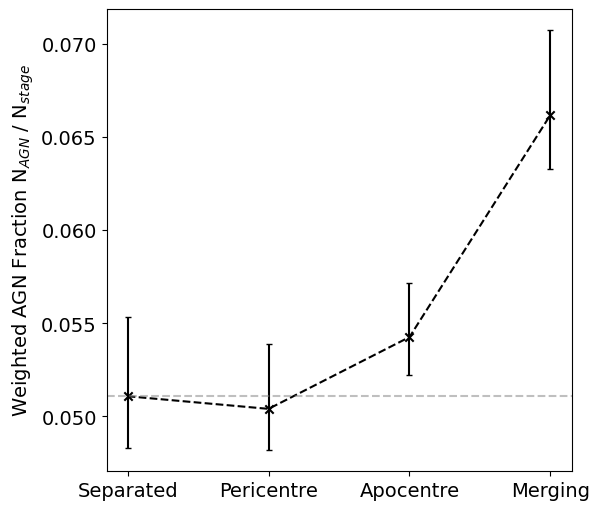

In [111]:
plt.figure(figsize = (6,6))
plt.scatter(x, weighted_fractions, color = 'black', marker = 'x')
plt.plot(x, weighted_fractions, color = 'black', linestyle='--')
plt.errorbar(x, weighted_fractions, yerr= np.asarray(p_agn).T, linestyle = '', barsabove=True, capsize=2, color='black')
plt.axhline(weighted_fractions[0], linestyle='--', alpha = 0.5, color='grey')
plt.ylabel('Weighted AGN Fraction N$_{AGN}$ / N$_{stage}$')
plt.savefig(f'{fig_folder}/new-agn-fraction-stage.pdf', bbox_inches = 'tight', dpi = 720)
plt.show()

[0.05951468193948024,
 0.05671845943708487,
 0.060838029330245125,
 0.07126384603335945]